# Advances in Data Mining - Assignment 3:

## Classification tasks
----------------------------------------------------

In [1]:
# Import
from scipy.stats import uniform, randint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import numpy as np
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, r2_score
import seaborn as sns

In this assignment we demonstrate and experiment with the following 3 popular classification algorithms: SVM, RandomForest and XGBoost. I will first try out each of these algorithms with a simple example dataset: MNIST. 

## Practice Run: Testing out the 3 models with basic MNIST data

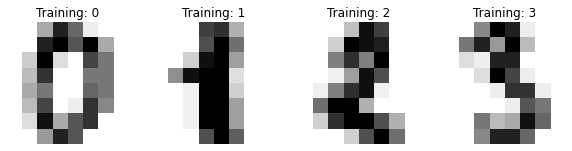

In [2]:
#Let's try out MNIST first!
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier 
sv_class = svm.SVC(gamma=0.001)
rf = RandomForestClassifier(n_estimators=100)
xgboost = xgb.XGBClassifier()

# Split data into 50% train and 50% test 
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Train the model
sv_class.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted_svm = sv_class.predict(X_test)
predicted_rf = rf.predict(X_test)
predicted_xgb = xgboost.predict(X_test)

C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:05:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Classification report for classifier <module 'sklearn.svm' from 'C:\\Users\\Jasmin\\anaconda3\\lib\\site-packages\\sklearn\\svm\\__init__.py'>:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  

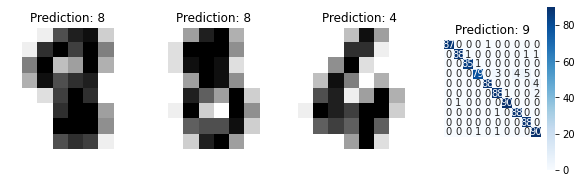

In [4]:
# SVM results
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_svm):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    
print(f"Classification report for classifier {svm}:\n" f"{metrics.classification_report(y_test, predicted_svm)}\n")

cm = confusion_matrix(y_test, predicted_svm)
s = sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
s.set(xlabel='Predicted label', ylabel='True label')
print(f"Confusion matrix:\n{cm}")

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.89      0.92        91
           2       1.00      0.93      0.96        86
           3       0.90      0.87      0.88        91
           4       0.97      0.93      0.95        92
           5       0.88      0.95      0.91        91
           6       0.99      1.00      0.99        91
           7       0.95      0.99      0.97        89
           8       0.95      0.88      0.91        88
           9       0.85      0.95      0.90        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 81  0  3  0  1  0  0  0  6]
 [ 1  0 80  3  0  0  0  0  0  2]
 [ 0  2  0 79  0  3  0  3  3  1]
 [ 2  0  0  0 86  1  0  1  

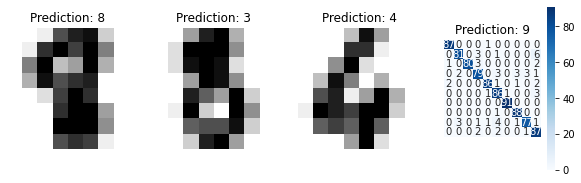

In [5]:
# Random Forest results
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_rf):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    
print(f"Classification report for classifier {rf}:\n" f"{metrics.classification_report(y_test, predicted_rf)}\n")

cm = confusion_matrix(y_test, predicted_rf)
s = sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
s.set(xlabel='Predicted label', ylabel='True label')
print(f"Confusion matrix:\n{cm}")

Classification report for classifier <module 'xgboost' from 'C:\\Users\\Jasmin\\anaconda3\\lib\\site-packages\\xgboost\\__init__.py'>:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.85      0.81      0.83        91
           2       0.93      0.90      0.91        86
           3       0.89      0.82      0.86        91
           4       0.95      0.85      0.90        92
           5       0.88      0.92      0.90        91
           6       0.92      0.90      0.91        91
           7       0.94      0.94      0.94        89
           8       0.86      0.85      0.86        88
           9       0.78      0.92      0.85        92

    accuracy                           0.89       899
   macro avg       0.89      0.89      0.89       899
weighted avg       0.89      0.89      0.89       899


Confusion matrix:
[[87  0  0  0  0  0  0  0  1  0]
 [ 0 74  1  3  2  0  0  0  1 10]
 [ 2  0 77  5  0  0  

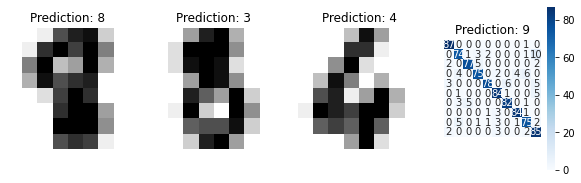

In [6]:
# XGBoost results
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_xgb):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    
print(f"Classification report for classifier {xgb}:\n" f"{metrics.classification_report(y_test, predicted_xgb)}\n")

cm = confusion_matrix(y_test, predicted_xgb)
s = sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
s.set(xlabel='Predicted label', ylabel='True label')
print(f"Confusion matrix:\n{cm}")

Our models seem to work! Now we have a baseline to work with to apply to our dataset.

## Problem and Data description

For this assignment we are using the Credit Card Fraud Detection dataset, which contains transactions made by credit cards in September 2013 by European cardholders and labels these transactions as either genuine or fraudulant. The dataset contains the following columns:

- *Time*; Number of seconds elapsed between this transaction and the first transaction in the dataset
- *Amount*; Transaction amount
- *Class*; 1 for fraudulent transactions, 0 otherwise
- *V1 to V28*; Variables that are the results of a PCA transformation. The original features are not given due to privacy reasons.

This dataset can be downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud

In this assignment, we would like to predict whether a transaction was fraudulant or not (so a binary classification) using 3 classification algorithms; Random Forest, Support Vector Machines, and XGBoost.

------------------------------------------
But first let's have a closer look at the dataset to see what we are dealing with!

## Experimental Setup
### Data Preprocessing and Exploratory Data Analysis

In [51]:
credit = pd.read_csv('creditcard.csv')

In [52]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
#Check if there are any null/nan values
credit.isnull().sum()
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

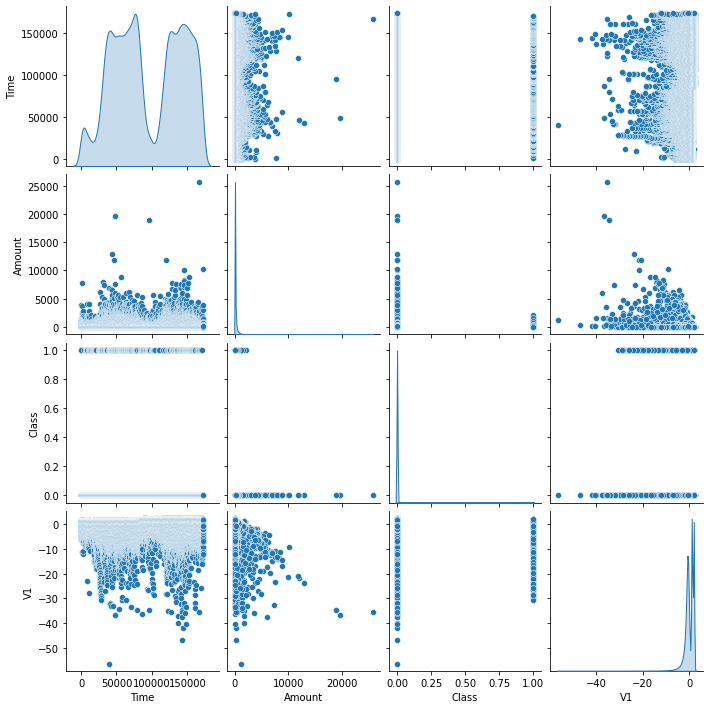

In [55]:
# Let's look at the distribution/paired-scatterplots of the data
## NOTE: this may take a while because it's going over all variables
## Therefore, you can also limit the data to certain variables and analyze those
sns.pairplot(credit,
             x_vars=['Time', 'Amount','Class', 'V1'],
             y_vars=['Time', 'Amount','Class', 'V1'], diag_kind='kde')

In [56]:
print('Genuine:', credit['Class'].value_counts()[0])
print('Fraudulant:', credit['Class'].value_counts()[1])

Genuine: 284315
Fraudulant: 492


The dataset seems quite skewed towards genuine transactions.

Let's already get an idea of which variables are correlated to help with our prediction

In [72]:
#Since the genuine cases are over represented, let's look at the correlation of a more equal sample of the data
fraud_df = credit[credit['Class'] == 1]
nonfraud_df = credit[credit['Class'] == 0].sample(len(fraud_df))
df_undersample = pd.concat([fraud_df, nonfraud_df]).sample(frac=1)

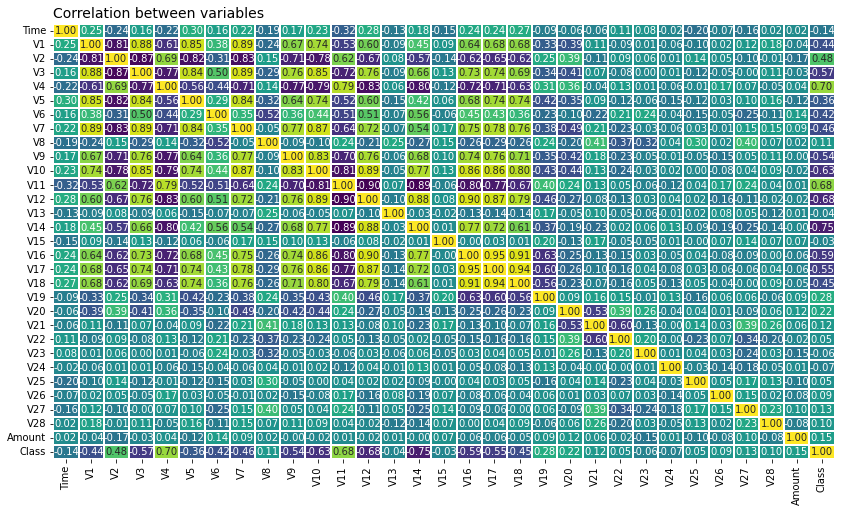

In [73]:
correlation = df_undersample.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlation, 
            annot=True, 
            fmt='.2f', 
            linewidth=2, 
            cbar=False,
            ax=ax, 
            cmap='viridis')
ax.set_title('Correlation between variables',
             loc='left', 
             fontsize=14)
plt.show()

In [74]:
correlated_variables = correlation[(abs(correlation['Class']) >= 0.5)]['Class'].index
correlated_variables = correlated_variables[:-1].tolist()
print('Independent variables correlated with the target variable:\n',correlated_variables)

Independent variables correlated with the target variable:
 ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [75]:
# Are there any duplicates in the dataset?
credit[credit.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [76]:
credit.drop_duplicates(inplace=True)

In [77]:
credit[credit.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Alright, now that the dataset has been processed an analyzed, we can setup our experiments!

### Parameter tuning

We decided to decrease the number of variables we train on since training the model will otherwise take too long. 

In [78]:
y = credit['Class'].values
X = credit[['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].values

In [79]:
X.shape

(283726, 9)

In [80]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Let's Look at Support Vector Machines as a Classifier first!
Let's try to find the best kernel to use and repeat this using K-fold cross validation. In our case let's use k=5.

In [88]:
# List to store the RMSE and R-squared values
all_rmse = []
all_r2 = []

# K-fold cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)

# Cross validation check the performances of the model

for train_index, test_index in kf.split(X):
    print("------------------------")
    print("TRAIN SIZE:",len(train_index), "TEST SIZE:", len(test_index))
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rmse_list = []
    r2_list = []
    # using different kernels
    kernels = ['linear', 'rbf','sigmoid']
    for kernel in kernels:
        svclass = svm.SVC(kernel=kernel)
        print("done 1/3")
        svclass.fit(X_train, y_train)
        print("done 2/3")
        predicted_svm = svclass.predict(X_test)
        print("done 3/3")
    
        # Evaluate the performance on the test set
        rmse = mean_squared_error(y_test, predicted_svm, squared=False)
        r2 = r2_score(y_test,predicted_svm)
        # Print the experiment specifications, RMSE and R-squared
        print("Kernel: " + kernel)
        print("RMSE: " + str(rmse))
        print("R2: " + str(r2))
        rmse_list.append(rmse)
        r2_list.append(r2)
        print(f"Classification report for classifier {sv_class}:\n" f"{metrics.classification_report(y_test, predicted_svm)}\n")
    all_rmse.append(rmse_list)
    all_r2.append(r2_list)    

------------------------
TRAIN SIZE: 226980 TEST SIZE: 56746
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [     6     11     12 ... 283710 283714 283717]
done 1/3
done 2/3
done 3/3
Kernel: linear
RMSE: 0.023372933318536078
R2: 0.6550083937368603
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.73      0.81        90

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746


done 1/3
done 2/3
done 3/3
Kernel: rbf
RMSE: 0.02221321339810083
R2: 0.6883946782139383
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.70      0.82        90

    accuracy                           1.00     

Since our dataset is quite unbalanced, by predicting 1 most of the time it is correct most of the time, therefore, we see a huge difference in precision, recall and f1-score between the macro average and weighted average. One way to tackle this is to only train our dataset on a balanced subset of the data. We do this by undersampling. An image of this can be seen below:

![alt text](undersampling.png "Title")

*Source: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/*


The main disadvantage to undersampling is that there may be some information loss. 
For the next experiments, let's also increase k-folds to 10.

In [92]:
print('Genuine:', df_undersample['Class'].value_counts()[0])
print('Fraudulant:', df_undersample['Class'].value_counts()[1])

Genuine: 473
Fraudulant: 473


In [96]:
y = df_undersample['Class'].values
X = df_undersample.drop(['Class'], axis=1).values

In [152]:
# List to store the all metrics
all_rmse = []
all_r2 = []
all_precision = []
all_recall = []
all_f1 = []

# K-fold cross validation
kf = KFold(n_splits=10, shuffle=False)
kf.get_n_splits(X)

# Cross validation check the performances of the model

for train_index, test_index in kf.split(X):
    print("------------------------")
    print("TRAIN SIZE:",len(train_index), "TEST SIZE:", len(test_index))
    print("TRAIN:", min(train_index),'-',max(train_index), "TEST:", min(test_index), '-', max(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rmse_list = []
    r2_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    # using different kernels
    kernels = ['linear', 'rbf','sigmoid']
    for kernel in kernels:
        svclass = svm.SVC(kernel=kernel)
        svclass.fit(X_train, y_train)
        predicted_svm = svclass.predict(X_test)
        
    
        # Evaluate the performance on the test set
        rmse = mean_squared_error(y_test, predicted_svm, squared=False)
        r2 = r2_score(y_test,predicted_svm)
        # Print the experiment specifications, RMSE and R-squared
        print("Kernel: " + kernel)
        print("RMSE: " + str(rmse))
        print("R2: " + str(r2))
        print("Precision:", metrics.precision_score(y_test, predicted_svm))
        print("recall:", metrics.recall_score(y_test, predicted_svm))
        print("F1 score:", metrics.f1_score(y_test, predicted_svm))
        
        
        precision_list.append(metrics.precision_score(y_test, predicted_svm))
        recall_list.append(metrics.recall_score(y_test, predicted_svm))
        f1_list.append(metrics.f1_score(y_test, predicted_svm))
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        #print(f"Classification report for classifier {sv_class}:\n" f"{metrics.classification_report(y_test, predicted_svm)}\n")
    all_rmse.append(rmse_list)
    all_r2.append(r2_list)
    all_precision.append(precision_list)
    all_recall.append(recall_list)
    all_f1.append(f1_list)

------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 95 - 945 TEST: 0 - 94
Kernel: linear
RMSE: 0.29019050004400465
R2: 0.6631205673758864
Precision: 1.0
recall: 0.8333333333333334
F1 score: 0.9090909090909091
Kernel: rbf
RMSE: 0.6649099662043687
R2: -0.7686170212765961
Precision: 0.5555555555555556
recall: 0.625
F1 score: 0.5882352941176471
Kernel: sigmoid
RMSE: 0.6958523739384593
R2: -0.9370567375886529
Precision: 0.5208333333333334
recall: 0.5208333333333334
F1 score: 0.5208333333333334
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 95 - 189
Kernel: linear
RMSE: 0.35540932665545544
R2: 0.4933333333333332
Precision: 0.9318181818181818
recall: 0.82
F1 score: 0.8723404255319149
Kernel: rbf
RMSE: 0.6569466853317864
R2: -0.7311111111111117
Precision: 0.5789473684210527
recall: 0.66
F1 score: 0.616822429906542
Kernel: sigmoid
RMSE: 0.6488856845230502
R2: -0.6888888888888896
Precision: 0.6
recall: 0.6
F1 score: 0.6
------------------------
TRAIN SIZE: 

### Results: SVM

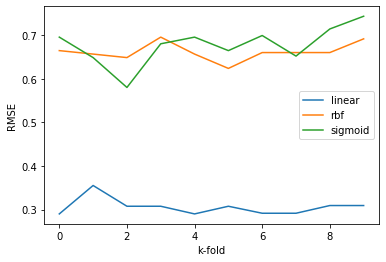

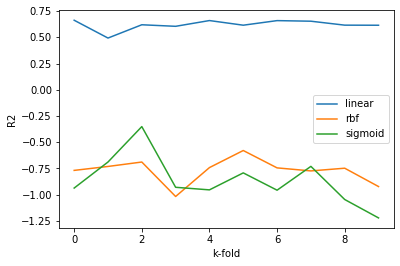

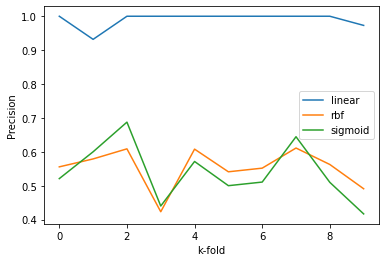

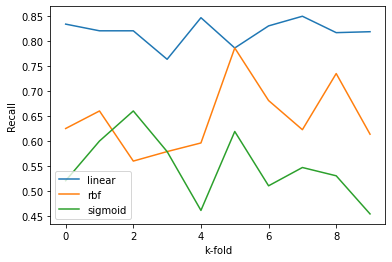

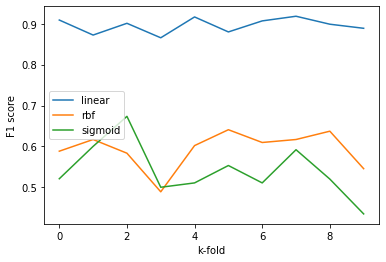

In [115]:
kernels = ['linear', 'rbf', 'sigmoid'] 

plt.xlabel("k-fold")
plt.ylabel("RMSE")
plt.plot(all_rmse, label=kernels)
plt.legend()
plt.show()

plt.xlabel("k-fold")
plt.ylabel("R2")
plt.plot(all_r2, label=kernels)
plt.legend()
plt.show()

plt.xlabel("k-fold")
plt.ylabel("Precision")
plt.plot(all_precision, label=kernels)
plt.legend()
plt.show()

plt.xlabel("k-fold")
plt.ylabel("Recall")
plt.plot(all_recall, label=kernels)
plt.legend()
plt.show()

plt.xlabel("k-fold")
plt.ylabel("F1 score")
plt.plot(all_f1, label=kernels)
plt.legend()
plt.show()

In [165]:
#Average RMSE of linear kernel SVM
linear = []
for i in range(10):
    linear.append(all_rmse[i][0])
    
np.mean(linear)

0.30614835573669574

In [164]:
#Average F1 score of linear kernel SVM
linear = []
for i in range(10):
    linear.append(all_f1[i][0])
    
np.mean(linear)

0.895797792868753

So it seems that using the linear kernel is best for minimizing error for this dataset using support vector machines as classifiers. Intuitively, linear kernels are used when data is linearly separable. Considering that this is a binary classification problem it might make more sense to use a linear kernel. 

### Now let's investigate Random Forest
Let's investigate the number of estimators for random forest classification. 

In [166]:
# List to store the RMSE and R-squared values
all_rmse = []
all_r2 = []
all_precision = []
all_recall = []
all_f1 = []


# K-fold cross validation
kf = KFold(n_splits=10, shuffle=False)
kf.get_n_splits(X)

# Cross validation check the performances of the model

n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

for train_index, test_index in kf.split(X):
    print("------------------------")
    print("TRAIN SIZE:",len(train_index), "TEST SIZE:", len(test_index))
    print("TRAIN:", min(train_index), '-', max(train_index), "TEST:", min(test_index), '-', max(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rmse_list = []
    r2_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for n in n_estimators:
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        pred = rf.predict(X_test)

    
        # Evaluate the performance on the test set
        rmse = mean_squared_error(y_test, pred, squared=False)
        r2 = r2_score(y_test,pred)
        
        # Print the experiment specifications, RMSE and R-squared
        print("N_estimators: ", n)
        print("RMSE: " + str(rmse))
        print("R2: " + str(r2))
        
        print("Precision:", metrics.precision_score(y_test, pred))
        print("recall:", metrics.recall_score(y_test, pred))
        print("F1 score:", metrics.f1_score(y_test, pred))
        
        
        precision_list.append(metrics.precision_score(y_test, pred))
        recall_list.append(metrics.recall_score(y_test, pred))
        f1_list.append(metrics.f1_score(y_test, pred))
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        #print(f"Classification report for classifier {rf}:\n" f"{metrics.classification_report(y_test, pred)}\n")
    all_rmse.append(rmse_list)
    all_r2.append(r2_list)
    all_precision.append(precision_list)
    all_recall.append(recall_list)
    all_f1.append(f1_list)

------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 95 - 945 TEST: 0 - 94
N_estimators:  100
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
N_estimators:  200
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
N_estimators:  300
RMSE: 0.17770466332772772
R2: 0.8736702127659575
Precision: 1.0
recall: 0.9375
F1 score: 0.967741935483871
N_estimators:  400
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
N_estimators:  500
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
N_estimators:  600
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
N_estimators:  700
RMSE: 0.17770466332772772
R2: 0.8736702127659575
Precision: 1

N_estimators:  1500
RMSE: 0.20519567041703082
R2: 0.8245614035087719
Precision: 0.9722222222222222
recall: 0.9210526315789473
F1 score: 0.9459459459459458
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 380 - 474
N_estimators:  100
RMSE: 0.14509525002200233
R2: 0.9150268336314847
Precision: 1.0
recall: 0.9615384615384616
F1 score: 0.9803921568627451
N_estimators:  200
RMSE: 0.17770466332772772
R2: 0.8725402504472272
Precision: 1.0
recall: 0.9423076923076923
F1 score: 0.9702970297029703
N_estimators:  300
RMSE: 0.17770466332772772
R2: 0.8725402504472272
Precision: 1.0
recall: 0.9423076923076923
F1 score: 0.9702970297029703
N_estimators:  400
RMSE: 0.17770466332772772
R2: 0.8725402504472272
Precision: 1.0
recall: 0.9423076923076923
F1 score: 0.9702970297029703
N_estimators:  500
RMSE: 0.17770466332772772
R2: 0.8725402504472272
Precision: 1.0
recall: 0.9423076923076923
F1 score: 0.9702970297029703
N_estimators:  600
RMSE: 0.14509525002200233
R2: 0.9150268336314

N_estimators:  1100
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.96
recall: 0.9056603773584906
F1 score: 0.9320388349514563
N_estimators:  1200
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.96
recall: 0.9056603773584906
F1 score: 0.9320388349514563
N_estimators:  1300
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.96
recall: 0.9056603773584906
F1 score: 0.9320388349514563
N_estimators:  1400
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9607843137254902
recall: 0.9245283018867925
F1 score: 0.9423076923076923
N_estimators:  1500
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.96
recall: 0.9056603773584906
F1 score: 0.9320388349514563
------------------------
TRAIN SIZE: 852 TEST SIZE: 94
TRAIN: 0 - 945 TEST: 758 - 851
N_estimators:  100
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
N_estimators:  200
RMSE: 0.23063280200722

### Results: Random Forest

In [167]:
def rearrange(alls):
    zyx = []
    for j in range(15):
        xyz = []
        for i in range(10):
            xyz.append(alls[i][j])
        zyx.append(xyz)
    return zyx

In [168]:
def averages(realls):
    avgs = []
    for i in range(15):
        avgs.append(sum(realls[i])/10)
    return avgs

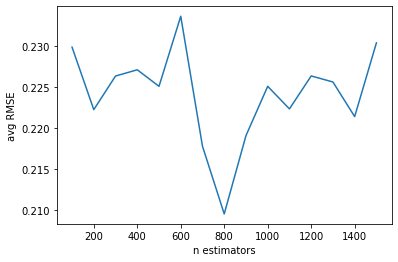

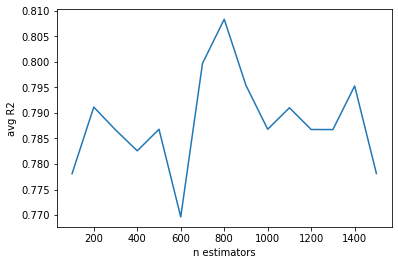

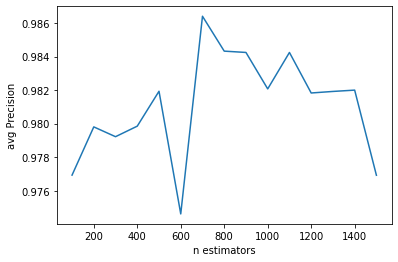

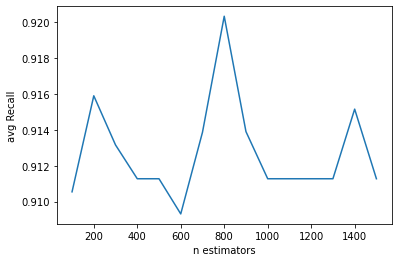

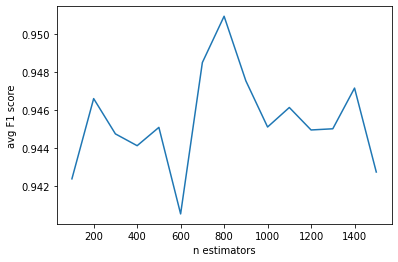

In [169]:
plt.xlabel("n estimators")
plt.ylabel("avg RMSE")
plt.plot(n_estimators, averages(rearrange(all_rmse)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg R2")
plt.plot(n_estimators, averages(rearrange(all_r2)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg Precision")
plt.plot(n_estimators, averages(rearrange(all_precision)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg Recall")
plt.plot(n_estimators, averages(rearrange(all_recall)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg F1 score")
plt.plot(n_estimators, averages(rearrange(all_f1)))
plt.show()

In [178]:
#Average F1 score of n=800 Random Forest
n800 = []
print(n_estimators[7])
for i in range(10):
    
    n800.append(all_f1[i][7])
    
np.mean(n800)

800


0.95095619163989

In [179]:
#Average RMSE of n=800 Random Forest
n800 = []
for i in range(10):
    n800.append(all_rmse[i][7])
    
np.mean(n800)

0.20957893439821507

So it seems that the most optimal value for n estimators is at n = 800 (avg f1 score is about 0.951), given the average rmse, r2, precision, recall and f1 score over all k = 10 folds. However, it should be noted that the difference in f1 score between n = 800 and the other possible values is not high, so actually there is no clear winner here.

### Lastly --> XGBoost

In [180]:
# List to store the RMSE and R-squared values
all_rmse = []
all_r2 = []
all_precision = []
all_recall = []
all_f1 = []


# K-fold cross validation
kf = KFold(n_splits=10, shuffle=False)
kf.get_n_splits(X)

# Cross validation check the performances of the model

n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

for train_index, test_index in kf.split(X):
    print("------------------------")
    print("TRAIN SIZE:",len(train_index), "TEST SIZE:", len(test_index))
    print("TRAIN:", min(train_index), '-', max(train_index), "TEST:", min(test_index), '-', max(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rmse_list = []
    r2_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for n in n_estimators:
        xgboost = xgb.XGBClassifier(n_estimators=n)
        xgboost.fit(X_train, y_train)
        pred = xgboost.predict(X_test)

    
        # Evaluate the performance on the test set
        rmse = mean_squared_error(y_test, pred, squared=False)
        r2 = r2_score(y_test,pred)
        
        # Print the experiment specifications, RMSE and R-squared
        print("N_estimators: ", n)
        print("RMSE: " + str(rmse))
        print("R2: " + str(r2))
        
        print("Precision:", metrics.precision_score(y_test, pred))
        print("recall:", metrics.recall_score(y_test, pred))
        print("F1 score:", metrics.f1_score(y_test, pred))
        
        
        precision_list.append(metrics.precision_score(y_test, pred))
        recall_list.append(metrics.recall_score(y_test, pred))
        f1_list.append(metrics.f1_score(y_test, pred))
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        #print(f"Classification report for classifier {rf}:\n" f"{metrics.classification_report(y_test, pred)}\n")
    all_rmse.append(rmse_list)
    all_r2.append(r2_list)
    all_precision.append(precision_list)
    all_recall.append(recall_list)
    all_f1.append(f1_list)

------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 95 - 945 TEST: 0 - 94
[18:05:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.20519567041703082
R2: 0.8315602836879432
Precision: 0.9782608695652174
recall: 0.9375
F1 score: 0.9574468085106383
[18:05:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
[18:05:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.22941573387056177
R2: 0.7894503546099291
Precision: 0.9574468085106383
recall: 0.9375
F1 score: 0.9473684210526315
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 95 - 189
[18:05:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
[18:05:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.2513123449750173
R2: 0.7466666666666666
Precision: 0.9782608695652174
recall: 0.9
F1 score: 0.9375
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 190 - 284
[18:05:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
[18:05:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.22941573387056177
R2: 0.7888888888888889
Precision: 1.0
recall: 0.9
F1 score: 0.9473684210526316
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 285 - 379
[18:05:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.14509525002200233
R2: 0.9122807017543859
Precision: 1.0
recall: 0.9473684210526315
F1 score: 0.972972972972973
[18:05:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
[18:06:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.17770466332772772
R2: 0.868421052631579
Precision: 1.0
recall: 0.9210526315789473
F1 score: 0.958904109589041
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 380 - 474
[18:06:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.20519567041703082
R2: 0.8300536672629696
Precision: 0.98
recall: 0.9423076923076923
F1 score: 0.9607843137254902
[18:06:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.20519567041703082
R2: 0.8300536672629696
Precision: 0.98
recall: 0.9423076923076923
F1 score: 0.9607843137254902
[18:06:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.20519567041703082
R2: 0.8300536672629696
Precision: 0.98
recall: 0.9423076923076923
F1 score: 0.9607843137254902
[18:06:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.22941573387056177
R2: 0.7875670840787119
Precision: 0.9795918367346939
recall: 0.9230769230769231
F1 score: 0.9504950495049506
[18:06:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.2513123449750173
R2: 0.7450805008944543
Precision: 0.96
recall: 0.9230769230769231
F1 score: 0.9411764705882353
[18:06:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.2513123449750173
R2: 0.7450805008944543
Precision: 0.96
recall: 0.9230769230769231
F1 score: 0.9411764705882353
[18:06:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.2513123449750173
R2: 0.7450805008944543
Precision: 0.96
recall: 0.9230769230769231
F1 score: 0.9411764705882353
[18:06:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.2513123449750173
R2: 0.7450805008944543
Precision: 0.96
recall: 0.9230769230769231
F1 score: 0.9411764705882353
------------------------
TRAIN SIZE: 851 TEST SIZE: 95
TRAIN: 0 - 945 TEST: 475 - 569
[18:06:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.29019050004400465
R2: 0.6585804132973945
Precision: 0.925
recall: 0.8809523809523809
F1 score: 0.9024390243902439
[18:06:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
[18:06:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.30779350562554625
R2: 0.6159029649595686
Precision: 0.9230769230769231
recall: 0.8571428571428571
F1 score: 0.888888888888889
------------------------
TRAIN SIZE: 852 TEST SIZE: 94
TRAIN: 0 - 945 TEST: 570 - 663
[18:06:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
[18:06:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.23063280200722128
R2: 0.7872340425531915
Precision: 1.0
recall: 0.8936170212765957
F1 score: 0.9438202247191011
------------------------
TRAIN SIZE: 852 TEST SIZE: 94
TRAIN: 0 - 945 TEST: 664 - 757
[18:06:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.23063280200722128
R2: 0.7837091578462955
Precision: 0.9615384615384616
recall: 0.9433962264150944
F1 score: 0.9523809523809524
[18:06:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9433962264150944
recall: 0.9433962264150944
F1 score: 0.9433962264150944
[18:06:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.9259259259259259
recall: 0.9433962264150944
F1 score: 0.9345794392523364
[18:06:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.27288841145490766
R2: 0.6971928209848136
Precision: 0.9259259259259259
recall: 0.9433962264150944
F1 score: 0.9345794392523364
[18:06:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9433962264150944
recall: 0.9433962264150944
F1 score: 0.9433962264150944
[18:06:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9433962264150944
recall: 0.9433962264150944
F1 score: 0.9433962264150944
[18:06:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9433962264150944
recall: 0.9433962264150944
F1 score: 0.9433962264150944
[18:06:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.25264557631995566
R2: 0.7404509894155545
Precision: 0.9433962264150944
recall: 0.9433962264150944
F1 score: 0.9433962264150944
------------------------
TRAIN SIZE: 852 TEST SIZE: 94
TRAIN: 0 - 945 TEST: 758 - 851
[18:06:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
[18:06:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.23063280200722128
R2: 0.7868480725623583
Precision: 0.9782608695652174
recall: 0.9183673469387755
F1 score: 0.9473684210526316
------------------------
TRAIN SIZE: 852 TEST SIZE: 94
TRAIN: 0 - 851 TEST: 852 - 945
[18:06:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
N_estimators:  100
RMSE: 0.1786474002526241
R2: 0.8718181818181818
Precision: 0.9767441860465116
recall: 0.9545454545454546
F1 score: 0.9655172413793104
[18:06:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  200
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  300
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  400
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  500
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  600
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  700
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  800
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  900
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1000
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1100
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1200
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1300
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1400
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117
[18:06:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jasmin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


N_estimators:  1500
RMSE: 0.14586499149789456
R2: 0.9145454545454546
Precision: 1.0
recall: 0.9545454545454546
F1 score: 0.9767441860465117


### Results: XGBoost

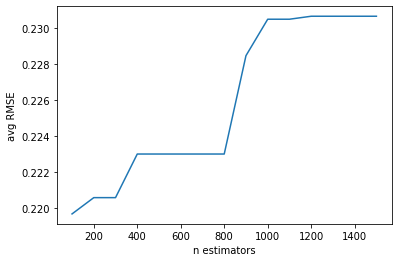

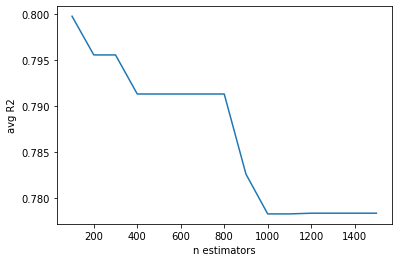

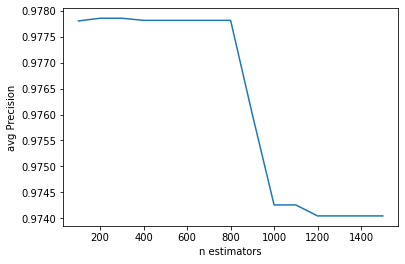

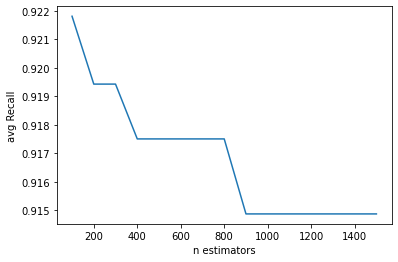

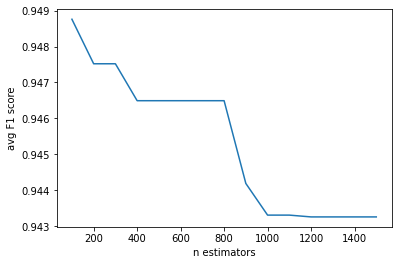

In [181]:
plt.xlabel("n estimators")
plt.ylabel("avg RMSE")
plt.plot(n_estimators, averages(rearrange(all_rmse)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg R2")
plt.plot(n_estimators, averages(rearrange(all_r2)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg Precision")
plt.plot(n_estimators, averages(rearrange(all_precision)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg Recall")
plt.plot(n_estimators, averages(rearrange(all_recall)))
plt.show()

plt.xlabel("n estimators")
plt.ylabel("avg F1 score")
plt.plot(n_estimators, averages(rearrange(all_f1)))
plt.show()

In [182]:
#Average F1 score of n=100 XGB
n = []
print(n_estimators[0])
for i in range(10):
    
    n.append(all_f1[i][0])
    
np.mean(n)

100


0.9487598380183971

In [183]:
#Average RMSE of n=100 XGB
n = []
for i in range(10):
    n.append(all_rmse[i][0])
    
np.mean(n)

0.21969509760199357

It seems the RMSE is lowest at n = 100, and precision/recall/f1-score is highest there too. However, once again the difference is not that large that it would make a big difference in classifying correctly. 

## Conclusions

Now that we've investigated 3 classifiers; Support Vector Machine, Random Forest and XGBoost, with different parameters we can use our results to make some conclusions about which classifier works best in this case and also discuss what might be improved in the future. 

Firstly, we will be using the F1-score and RMSE to primarily compare these models, as using R squared in a classification task is not that useful. In the case of SVM, the model with the highest f1-score was the one using a linear kernel, with an average  score (k = 10) of about 0.896 and an RMSE of about 0.306. In the case of the Random Forest classifier, f1-score was 0.951 and RMSE was 0.2096. Lastly, XGBoost gave an f1-score of 0.9488 with an RMSE of 0.2197. Overall, it seems the best performing model is the Random Forest Classifier. 

In the future, more experiments can be done on other parameters of interest. Additionally, we could further investigate if limiting the features we train the model on, for instance only variables which are correlated in some way to the *Class* target variable, may improve predictions. Also, it may be interesting to look at oversampling instead of undersampling the dataset to give more training data available to the model. This of course has the drawback of possibnle overfitting. Another thing to try could be to try other randomized methods of undersampling.

## Sources used:
- https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
- https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html